# Example of Mixture of Gaussains with Deomonstrations

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mixture_of_gaussians import MixtureOfGaussianDemonstrators

In [2]:
def plot_rings(mu, cov, ax):
    
    x, y = np.mgrid[0:16:0.1, 0:16:0.1]
    pos = np.dstack((x, y))
    rv = st.multivariate_normal(mu, cov)
    ax.contour(x, y, rv.pdf(pos), levels=3)

## Basic Example

In [3]:
data = []

for i in [1, 2]:
    for j in [1, 2, 3, 4, 5]:
        for k in range(100):
            x = np.random.multivariate_normal([5*i, 5*i], [[0.5*i, 0],[0, 5/i]], 1).tolist()[0]
            x.append(j*i)
            x.append(i)
            data.append(x)
            
data = pd.DataFrame(np.array(data), columns=['x', 'y', 'd', 'g'])           

In [4]:
means = KMeans(2).fit(data.drop(['d', 'g'], axis=1).to_numpy()).cluster_centers_

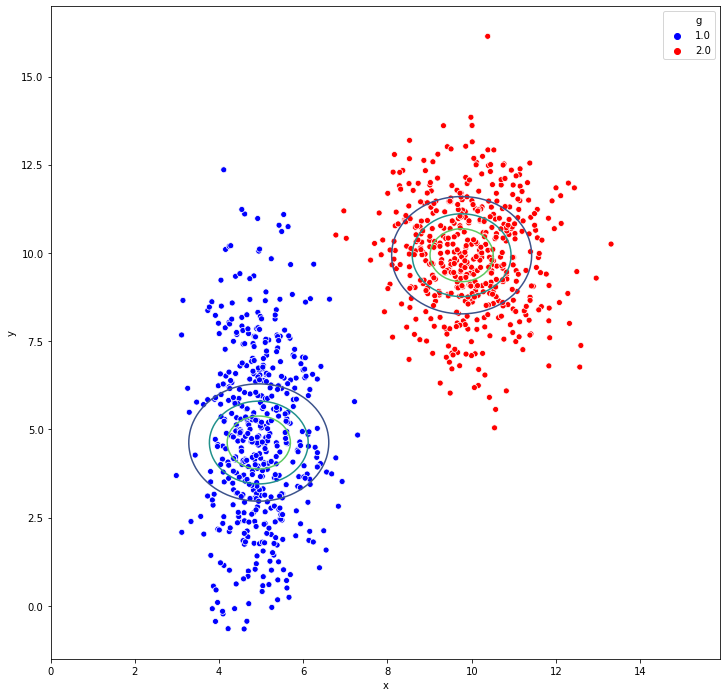

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['blue', 'red'])
plot_rings(means[0], [[1, 0],[0,1]], ax)
plot_rings(means[1], [[1, 0],[0,1]], ax)

In [6]:
demos = [
    [0,99],
    [100, 199],
    [200, 299],
    [300, 399],
    [400, 499],
    [500, 599],
    [600, 699],
    [700, 799],
    [800, 899],
    [900, 999]
]
model = MixtureOfGaussianDemonstrators().fit(data.drop(['d', 'g'], axis=1).to_numpy(), 2, demos)

In [7]:
cluster, log_like = model.results()

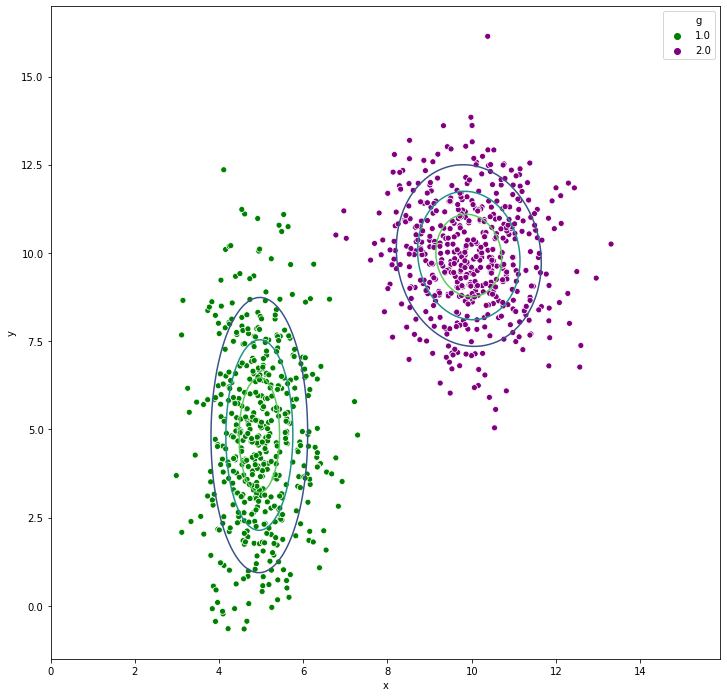

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['green', 'purple'])
plot_rings(cluster[0]['mu_k'], cluster[0]['cov_k'], ax)
plot_rings(cluster[1]['mu_k'], cluster[1]['cov_k'], ax)

## More interesting example

In [9]:
data = []

for i in [1, 2]:
    for j in [1, 2, 3, 4, 5]:
        for k in range(100):
            if i ==1:
                x = np.random.multivariate_normal([5, 5], [[5, 0],[0, 0.5]], 1).tolist()[0]
            else:
                x = np.random.multivariate_normal([5, 5], [[0.5, 0],[0, 5]], 1).tolist()[0]
            x.append(j*i)
            x.append(i)
            data.append(x)
            
data = pd.DataFrame(np.array(data), columns=['x', 'y', 'd', 'g']) 
means = KMeans(2).fit(data.drop(['d', 'g'], axis=1).to_numpy()).cluster_centers_

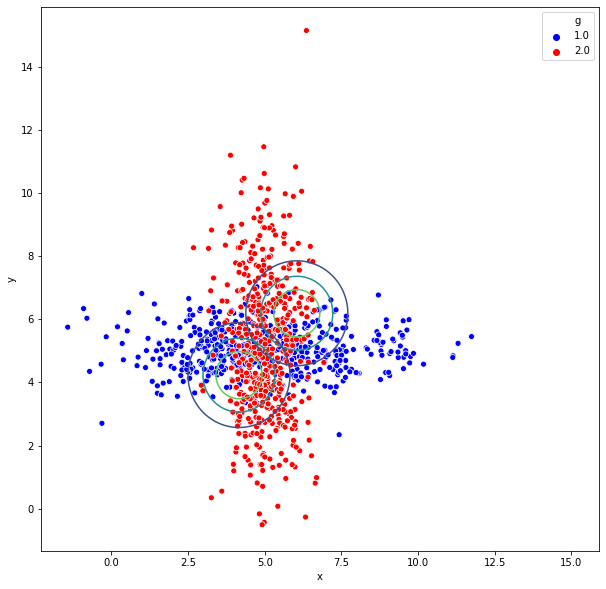

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['blue', 'red'])
plot_rings(means[0], [[1, 0],[0,1]], ax)
plot_rings(means[1], [[1, 0],[0,1]], ax)

In [11]:
demos = [
    [0,99],
    [100, 199],
    [200, 299],
    [300, 399],
    [400, 499],
    [500, 599],
    [600, 699],
    [700, 799],
    [800, 899],
    [900, 999]
]
# demos = [
#     [0, 9],
#     [10, 19],
#     [20, 29],
#     [30, 39],
#     [40, 49],
#     [50, 59],
#     [60, 69],
#     [70, 79],
#     [80, 89],
#     [90, 99]
# ]
model = MixtureOfGaussianDemonstrators().fit(data.drop(['d', 'g'], axis=1).to_numpy(), 2, demos)
cluster, log_like = model.results()

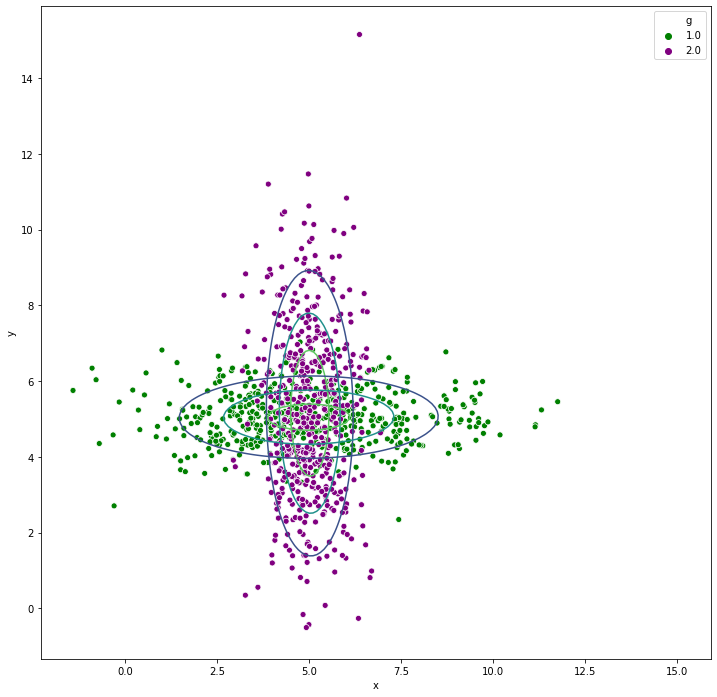

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot('x', 'y', hue='g',data=data, ax=ax, palette=['green', 'purple'])
plot_rings(cluster[0]['mu_k'], cluster[0]['cov_k'], ax)
plot_rings(cluster[1]['mu_k'], cluster[1]['cov_k'], ax)

In [13]:
cluster

[{'pi_k': 0.5,
  'mu_k': array([5.01075626, 5.1536874 ]),
  'cov_k': array([[ 0.50829913, -0.04508184],
         [-0.04508184,  5.21324089]]),
  'gamma_k': array([2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,
         2.82084039e-155, 2.82084039e-155, 2.82084039e-155, 2.82084039e-155,